In [1]:
# change to `%matplotlib` for interactive methods
%matplotlib

from imgseries import GreyLevel

Using matplotlib backend: Qt5Agg


In [2]:
basefolder = 'data'  # where analysis data etc. will be saved into and loaded from
folders = 'data/img1', 'data/img2'

# Minimal analysis

In [3]:
gl = GreyLevel(folders, savepath=basefolder)

# or, if working with a tiff stack: gl = GreyLevel(stack='stack.tif', savepath=basefolder)

The line below assumes that analysis zones have already been defined and saved in the metadata file (see details further below)

In [4]:
gl.regenerate()

# Previously:
# gl.load_transform()
#gl.zones.load()

Now, run analysis on these zones.

In [5]:
gl.run()

100%|████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 94.27it/s]


Note that for large numbers of images, it can be faster to distribute computation across multiple computer cores:

In [6]:
gl.run(parallel=True)  # has some startup delay due to multiprocessing initiation

100%|████████████████████████████████████████████████████████████| 50/50 [00:16<00:00,  3.00it/s]


Results are stored in the `data` attribute, which is a pandas DataFrame (times are automatically extracted from image creation date, but can be modified, see further below)) 

In [7]:
gl.data.head()

,folder,filename,time (unix),zone 1,zone 2,zone 3
num,,,,,,
0,img1,img-00610.png,1.599832e+09,69.861462,62.143014,88.134096
1,img1,img-00611.png,1.599832e+09,69.754513,62.061832,88.122558
2,img1,img-00612.png,1.599832e+09,69.777077,62.105780,88.175946
3,img1,img-00613.png,1.599832e+09,69.659798,62.014832,88.102289
4,img1,img-00614.png,1.599832e+09,69.659037,62.016725,88.065293


In [8]:
gl.zones.show()

<AxesSubplot:title={'center':'Analysis Zones (img #0)'}>

In [9]:
gl.animate()

Traceback (most recent call last):
  File "C:\Users\olivier.vincent\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 224, in process
    func(*args, **kwargs)
  File "C:\Users\olivier.vincent\Anaconda3\lib\site-packages\matplotlib\animation.py", line 959, in _start
    self._init_draw()
  File "C:\Users\olivier.vincent\Anaconda3\lib\site-packages\matplotlib\animation.py", line 1703, in _init_draw
    self._draw_frame(next(self.new_frame_seq()))
  File "C:\Users\olivier.vincent\Anaconda3\lib\site-packages\matplotlib\animation.py", line 1726, in _draw_frame
    self._drawn_artists = self._func(framedata, *self._args)
  File "C:\Users\olivier.vincent\Python-OV\imgseries\imgseries\plot.py", line 34, in plot
    self.first_plot(data)
  File "C:\Users\olivier.vincent\Python-OV\imgseries\imgseries\grey_level.py", line 48, in first_plot
    for zone_name, glevel in zip(self.img_series.zones.data, glevels):
NameError: name 'glevels' is not defined


In [10]:
gl.inspect()

Error (name 'glevels' is not defined) with GreyLevelResultsPlot viewer, trying with ImgSeriesPlot


Plot grey level of every zone as a function of time:

<AxesSubplot:xlabel='time (unix)'>

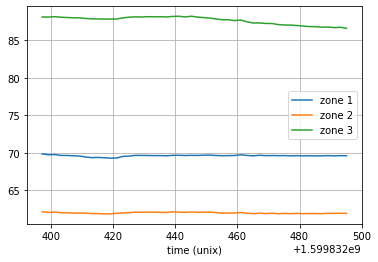

In [8]:
gl.data.set_index('time (unix)').filter(like='zone').plot(grid=True)

Save data in a tsv (tab-separated value) file, using default filename (filename can be set as a parameter if necessary, see further below). Metadata including zone info, path info, and code version info is also saved in a .json file at the same time. 

Before saving, make sure the timing info is correct for all images. If not, correct timing info, re-run the analysis, and call save().

In [9]:
gl.save()

# Defining global transform (rotation, crop)
(optional, see ImgSeries notebook for more details)

In [11]:
gl.rotation.define()
gl.crop.define()

Line position recorded. Line deleted.


# Defining and viewing analysis zones

In [10]:
gl = GreyLevel(folders, savepath=basefolder)

Zone defining has to be done at least once.

**Important**: Matplotlib must be in an interactive mode to do so.

Defining does not need to be done again in the following situations:
- calling methods again from the same `gl` object, e.g. `gl.run()`
- calling `gl.zones.load()` to load zones data from saved metadata (.json) file.

In [6]:
gl.zones.define()  # define one zone using the first image of the series

In [5]:
gl.zones.define(3)  # define 3 zones using the first image of the series

In [5]:
gl.zones.define(3, num=10)  # define 3 zones using image #10 in the series

In [7]:
gl.zones.define(3, draggable=True)  # define 3 zones using draggable rectangles instead of clicks

Rectangle position recorded. Rectangle deleted.
Rectangle position recorded. Rectangle deleted.
Rectangle position recorded. Rectangle deleted.


Viewing analysis zones after defining or loading them:

In [8]:
gl.zones.data

{'zone 1': (18, 28, 126, 104),
 'zone 2': (440, 26, 132, 120),
 'zone 3': (38, 431, 519, 85)}

<AxesSubplot:title={'center':'Analysis Zones (img #0)'}>

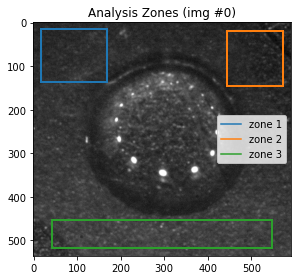

In [10]:
gl.zones.show()  # show zones on first image of series

**Note**: At the moment, saving zones data is done by calling `gl.save()`, which saves both data and metadata. Be careful because calling `gl.save()` also overwrites saved analysis data (potentially with no data if no analysis has been run yet). This makes sure that metadata in .json files actually corresponds to the data in the .tsv file.

# Analyze only subset of images

In [10]:
gl = GreyLevel(folders, savepath=basefolder)

In [11]:
gl.zones.load()

In [12]:
gl.run(start=10)  # Analyze only from image #10
gl.data.head()

100%|███████████████████████████████████████████████████████████| 40/40 [00:00<00:00, 188.00it/s]


,folder,filename,time (unix),zone 1,zone 2,zone 3
num,,,,,,
10,img1,img-00620.png,1.599832e+09,68.585725,61.883142,86.884977
11,img1,img-00621.png,1.599832e+09,68.538704,61.918391,86.898649
12,img1,img-00622.png,1.599832e+09,68.574690,61.932759,86.892388
13,img1,img-00623.png,1.599832e+09,68.789628,61.967864,87.056080
14,img1,img-00624.png,1.599832e+09,68.849152,62.015182,87.138355


In [16]:
gl.run(end=25)  # Analyze only up to image #25, not included
gl.data.tail()

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 25/25 [00:00<00:00, 159.81it/s]


,folder,filename,time (unix),zone 1,zone 2,zone 3
num,,,,,,
20,img1,img-00630.png,1.620833e+09,68.905795,62.022797,87.160375
21,img1,img-00631.png,1.620833e+09,68.977495,62.101580,87.239385
22,img1,img-00632.png,1.620833e+09,68.975429,62.059243,87.264562
23,img1,img-00633.png,1.620833e+09,68.950641,62.039751,87.174074
24,img1,img-00634.png,1.620833e+09,68.970809,62.086877,87.269003


In [17]:
gl.run(skip=5)  # Analyze only every 5-th image
gl.data.head()

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 165.70it/s]


,folder,filename,time (unix),zone 1,zone 2,zone 3
num,,,,,,
0,img1,img-00610.png,1.620833e+09,69.036475,62.122701,87.176963
5,img1,img-00615.png,1.620833e+09,68.807621,61.954119,87.076415
10,img1,img-00620.png,1.620833e+09,68.585725,61.883142,86.884977
15,img1,img-00625.png,1.620833e+09,68.943194,62.067864,87.186702
20,img1,img-00630.png,1.620833e+09,68.905795,62.022797,87.160375


# Manage image time information

It can be useful to save image time information and num/image correspondence in a file that can be used later for reference, i.e. if the images are copied or moved and lose their internal time information. To to so:

In [11]:
gl = GreyLevel(folders, savepath=basefolder)  # Note: here, one could user ImgSeries instead of GreyLevel
gl.info.head()  # see what file and timing info is availlable

,folder,filename,time (unix)
num,,,
0,img1,img-00610.png,1.599832e+09
1,img1,img-00611.png,1.599832e+09
2,img1,img-00612.png,1.599832e+09
3,img1,img-00613.png,1.599832e+09
4,img1,img-00614.png,1.599832e+09


In [12]:
gl.save_info()  # save into default filename (defined in config.py)

In [13]:
gl.save_info('Img_Files_SavingTest.tsv')  # save into custom filename. Here, extension must be specified

Now, to reload all file and timing info from a previously saved file, use:

In [14]:
gl.load_info('for-tests-do-not-modify/Img_Files_Saved.tsv')    # replaces all file data

But to keep folder / file info automatically detected by `GreyLevel` instantiation and modify only timing info using data from another file:

In [15]:
gl.load_time('for-tests-do-not-modify/Img_Files_Rounded.tsv')    # only updates times info
gl.info.head()

,folder,filename,time (unix)
num,,,
0,img1,img-00610.png,1599832397
1,img1,img-00611.png,1599832399
2,img1,img-00612.png,1599832401
3,img1,img-00613.png,1599832403
4,img1,img-00614.png,1599832405


In this last situation, the file must be tab-separated and contain at least `num` and `time (unix)` columns. The data present in the file must have rows cover at least all `num` values already present in `gl.info`.

# Load analysis data a posteriori

In [16]:
gl = GreyLevel(folders, savepath=basefolder)  # no need to specify folders here, except if one wants to load images

### Load data and metadata for external use

In [17]:
data = gl.load()
data.head()

,folder,filename,time (unix),zone 1,zone 2,zone 3
num,,,,,,
0,img1,img-00610.png,1.599832e+09,69.861462,62.143014,88.134096
1,img1,img-00611.png,1.599832e+09,69.754513,62.061832,88.122558
2,img1,img-00612.png,1.599832e+09,69.777077,62.105780,88.175946
3,img1,img-00613.png,1.599832e+09,69.659798,62.014832,88.102289
4,img1,img-00614.png,1.599832e+09,69.659037,62.016725,88.065293


In [18]:
metadata = gl.load_metadata()
metadata

{'path': 'C:\\Users\\olivier.vincent\\Python-OV\\imgseries\\data',
 'folders': ['img1', 'img2'],
 'zones': {'zone 1': [18, 15, 152, 121],
  'zone 2': [444, 19, 129, 127],
  'zone 3': [44, 454, 504, 65]},
 'rotation': {'angle': -0.3425123582361368},
 'crop': {'zone': [10, 8, 591, 536]},
 'time (utc)': '2023-01-27 07:01:38',
 'code version': {'skimage': {'status': 'not a git repository',
   'tag': 'v0.17.2'},
  'imgseries': {'hash': '0092eaca6c4eabb1336d5aa15017e487c0a6439a',
   'status': 'dirty'},
  'imgbasics': {'hash': '95ab3694d6b2b6525bbd25ebe9dc0319eaeeeab8',
   'status': 'clean',
   'tag': 'v0.2.1'},
  'filo': {'hash': '150574b5ae82c74d0c500b3fdb494e8f9c7631f7',
   'status': 'clean',
   'tag': 'v1.1.5'},
  'matplotlib': {'status': 'not a git repository', 'tag': 'v3.3.2'},
  'numpy': {'status': 'not a git repository', 'tag': 'v1.19.2'}}}

If one wants to use zone methods as above, one must first reload the zones using saved data:

In [19]:
gl.zones.load()  # dict of tuples (xmin, ymin, width height) for every zone analyzed
gl.zones.data

{'zone 1': [18, 15, 152, 121],
 'zone 2': [444, 19, 129, 127],
 'zone 3': [44, 454, 504, 65]}

### Completely regenerate state after analysis to be able to use all GreyLevel methods

In [20]:
gl.regenerate()

In [21]:
print(gl.crop)
print(gl.rotation)
print(gl.zones)
gl.data.head()

Crop object {'zone': [10, 8, 591, 536]}
Rotation object {'angle': -0.3425123582361368}
Zones object {'zone 1': [18, 15, 152, 121], 'zone 2': [444, 19, 129, 127], 'zone 3': [44, 454, 504, 65]}


,folder,filename,time (unix),zone 1,zone 2,zone 3
num,,,,,,
0,img1,img-00610.png,1.599832e+09,69.861462,62.143014,88.134096
1,img1,img-00611.png,1.599832e+09,69.754513,62.061832,88.122558
2,img1,img-00612.png,1.599832e+09,69.777077,62.105780,88.175946
3,img1,img-00613.png,1.599832e+09,69.659798,62.014832,88.102289
4,img1,img-00614.png,1.599832e+09,69.659037,62.016725,88.065293


If one wants to show the zones on actual images, one must either specify `paths` in the `glevels` instanciation above, or reload the file info using `load_info()` (see above). Note that the image files must still be present in the same location, or `load_info` must be called with a specific filename containing updated file location):

In [22]:
gl.load_info()  # use default filename, or:
gl.load_info('for-tests-do-not-modify/Img_Files_Saved.tsv')

<AxesSubplot:title={'center':'Analysis Zones (img #10)'}>

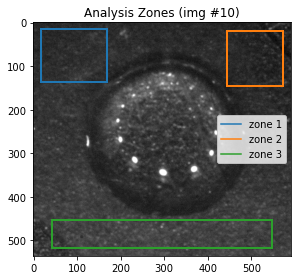

In [23]:
gl.zones.show(10)  # show zones on 10-th image

# Load / save with custom filenames

Loading and saving data can accept custom filenames as arguments, without extensions (they are added automatically, with `.tsv` for analysis data, and `.json` for metadata, e.g. (lines below should follow a `gl.run()` so that `gl.data` is defined):

In [21]:
gl.save('Img_GreyLevel_SavingTest')  # generates both .json and .tsv files

In [22]:
data = gl.load('Img_GreyLevel_SavingTest')  # loads from .tsv file
data.head()

,folder,filename,time (unix),zone 1,zone 2,zone 3
num,,,,,,
0,img1,img-00610.png,1.599832e+09,69.792346,61.988281,87.333981
1,img1,img-00611.png,1.599832e+09,69.682485,61.919363,87.315412
2,img1,img-00612.png,1.599832e+09,69.711785,61.962286,87.377436
3,img1,img-00613.png,1.599832e+09,69.594640,61.871811,87.303698
4,img1,img-00614.png,1.599832e+09,69.602250,61.886858,87.263077


# Access individual images

`GreyLevel` inherits from `ImageSeries` so that some useful methods are available, e.g.

In [11]:
gl = GreyLevel(paths=folders, savepath=basefolder)

In [12]:
gl.files[33]

filo.File #33 [img-00643.png in folder 'data\img2']

In [13]:
gl.files[33].file

WindowsPath('data/img2/img-00643.png')

In [14]:
gl.read(33)  # read image num 33 as an array

array([[ 69,  68,  72, ...,  69,  65,  56],
       [ 65,  54,  52, ...,  59,  59,  65],
       [ 65,  59,  59, ...,  61,  66,  63],
       ...,
       [ 81,  90,  77, ...,  92,  90, 103],
       [ 80,  91,  81, ...,  91,  90,  98],
       [ 89,  83,  83, ...,  87,  94, 103]], dtype=uint8)

**NOTE**: `show()` only works if the analysis results are loaded

In [15]:
gl.regenerate()

In [18]:
gl.show(33)